In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../")
import seaborn as sns 
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn

# Ignorar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# leemos el dataframe
df_em = pd.read_csv("../datos/employee_survey_data.csv", index_col = 0).reset_index(drop=True)
df_data = pd.read_csv("../datos/general_data.csv", index_col = 0).reset_index()
df_manag = pd.read_csv("../datos/manager_survey_data.csv", index_col = 0).reset_index(drop=True)


In [3]:
# Concatenar lateralmente
df = pd.concat([df_em, df_data, df_manag], axis=1)

In [4]:
# llamamos a la función para hacer el análisis exploratorio de datos, para familiarizarnos con la estructura de los datos
sl.exploracion_datos(df)

El número de filas es 4410 y el número de columnas es 29



----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,4385.0,2.723603,1.092756,1.0,2.00,3.0,4.00,4.0
JobSatisfaction,4390.0,2.728246,1.101253,1.0,2.00,3.0,4.00,4.0
WorkLifeBalance,4372.0,2.761436,0.706245,1.0,2.00,3.0,3.00,4.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  EmployeeID               4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel      

None

In [5]:
df.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [6]:
df.drop(columns=['EmployeeCount','Over18','EmployeeID','StandardHours','WorkLifeBalance'],inplace=True)

## Razones para el dropeo:

**NúmeroDeEmpleados**---> Solo hay valores 1, un solo empleado.

**Over18**--> Solo tenemos valor YES.

**EmployeeID**--> Es un valor unico para cada empleado.

**HorasEstándar** --> Solo hay valores 1, 8 horas  .

**EquilibrioVidaLaboral**--> Columnas con 87 porciento Nulos.


In [7]:
# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
gestionar_nulos = sn.GestionNulos(df)
nulos = gestionar_nulos.calcular_porcentaje_nulos()
nulos

EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
NumCompaniesWorked         0.430839
TotalWorkingYears          0.204082
dtype: float64

In [8]:
gestionar_nulos.mostrar_distribucion_categoricas()

In [9]:
columnas_desconocido = df.select_dtypes(include=['object']).columns             # Vamos a reemplazar categoricas por  valor desconocido
columnas_moda = []            # Vamos a reemplazar categoricas por  valor desconocido

In [10]:
df = gestionar_nulos.imputar_nulos_categoricas(columnas_moda, columnas_desconocido)
df.head(2)

,EnvironmentSatisfaction,JobSatisfaction,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,...,1.0,11,0,1.0,6,1,0,0,3,3
1,3.0,2.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,...,0.0,23,1,6.0,3,5,1,4,2,4


In [11]:
# llamamos al método para imputar valores nulos con el método KNN
gestionar_nulos.imputar_knn(nulos.index)
# mostramos los resultados
df.head(2)

,EnvironmentSatisfaction,JobSatisfaction,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,3.0,4.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,...,6,1,0,0,3,3,3.0,4.0,1.0,1.0
1,3.0,2.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,...,3,5,1,4,2,4,3.0,2.0,0.0,6.0


In [12]:
df = df.drop(columns=['EnvironmentSatisfaction','JobSatisfaction','NumCompaniesWorked','TotalWorkingYears'])
df.head(2)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,3,3,3.0,4.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,2,4,3.0,2.0,0.0,6.0


In [13]:
df.duplicated().sum()

np.int64(2881)

In [14]:
df = df.drop_duplicates()

In [15]:
#comprobamos los valores unicos de las columnas qye consideramos categoricas
df['EnvironmentSatisfaction_knn'].unique()
df['JobSatisfaction_knn'].unique()
df['PerformanceRating'].unique()
df['Education'].unique()
df['JobLevel'].unique()
df['TrainingTimesLastYear'].unique()
df['JobInvolvement'].unique()

array([3, 2, 1, 4])

In [16]:
#Vamos a cambiar a object las columnas que son categorias para las visualizaciones.
df['EnvironmentSatisfaction_knn'] = df['EnvironmentSatisfaction_knn'].astype('object')
df['JobSatisfaction_knn'] = df['JobSatisfaction_knn'].astype('object')
df['PerformanceRating'] = df['PerformanceRating'].astype('object')
df['JobLevel'] = df['JobLevel'].astype('object')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('object')
df['JobInvolvement'] = df['JobInvolvement'].astype('object')
df['Education'] = df['Education'].astype('object')


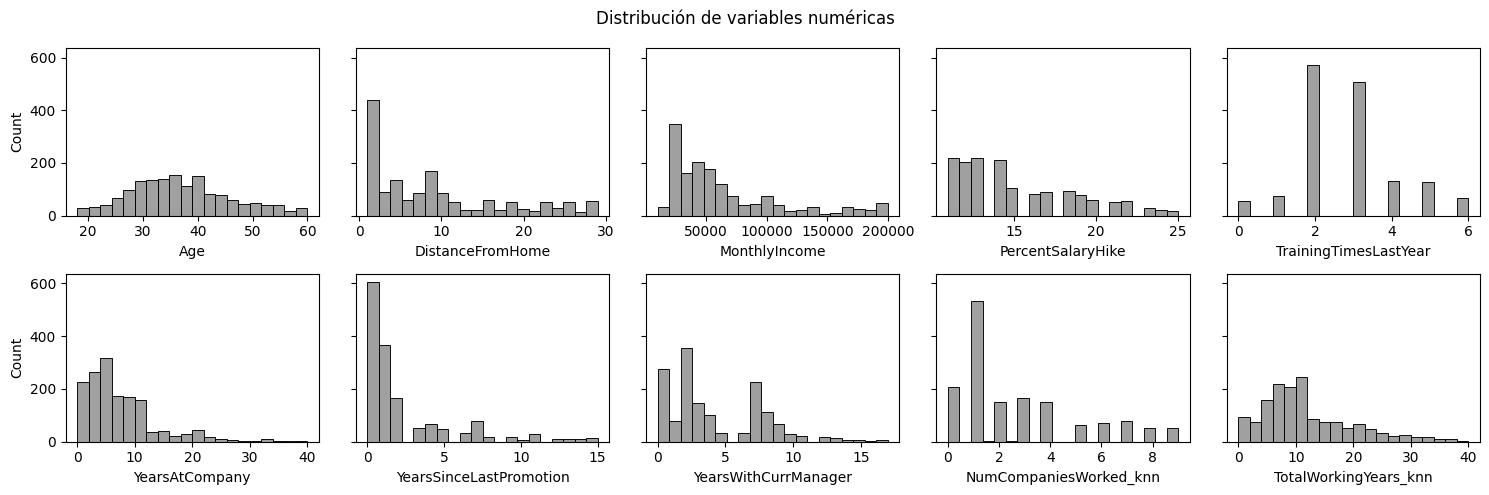

In [17]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sl.Visualizador(df)

# exploramos la distribución de las variables numéricas
visualizador.plot_numericas()

**Variable respuesta binaria**  = Desercion

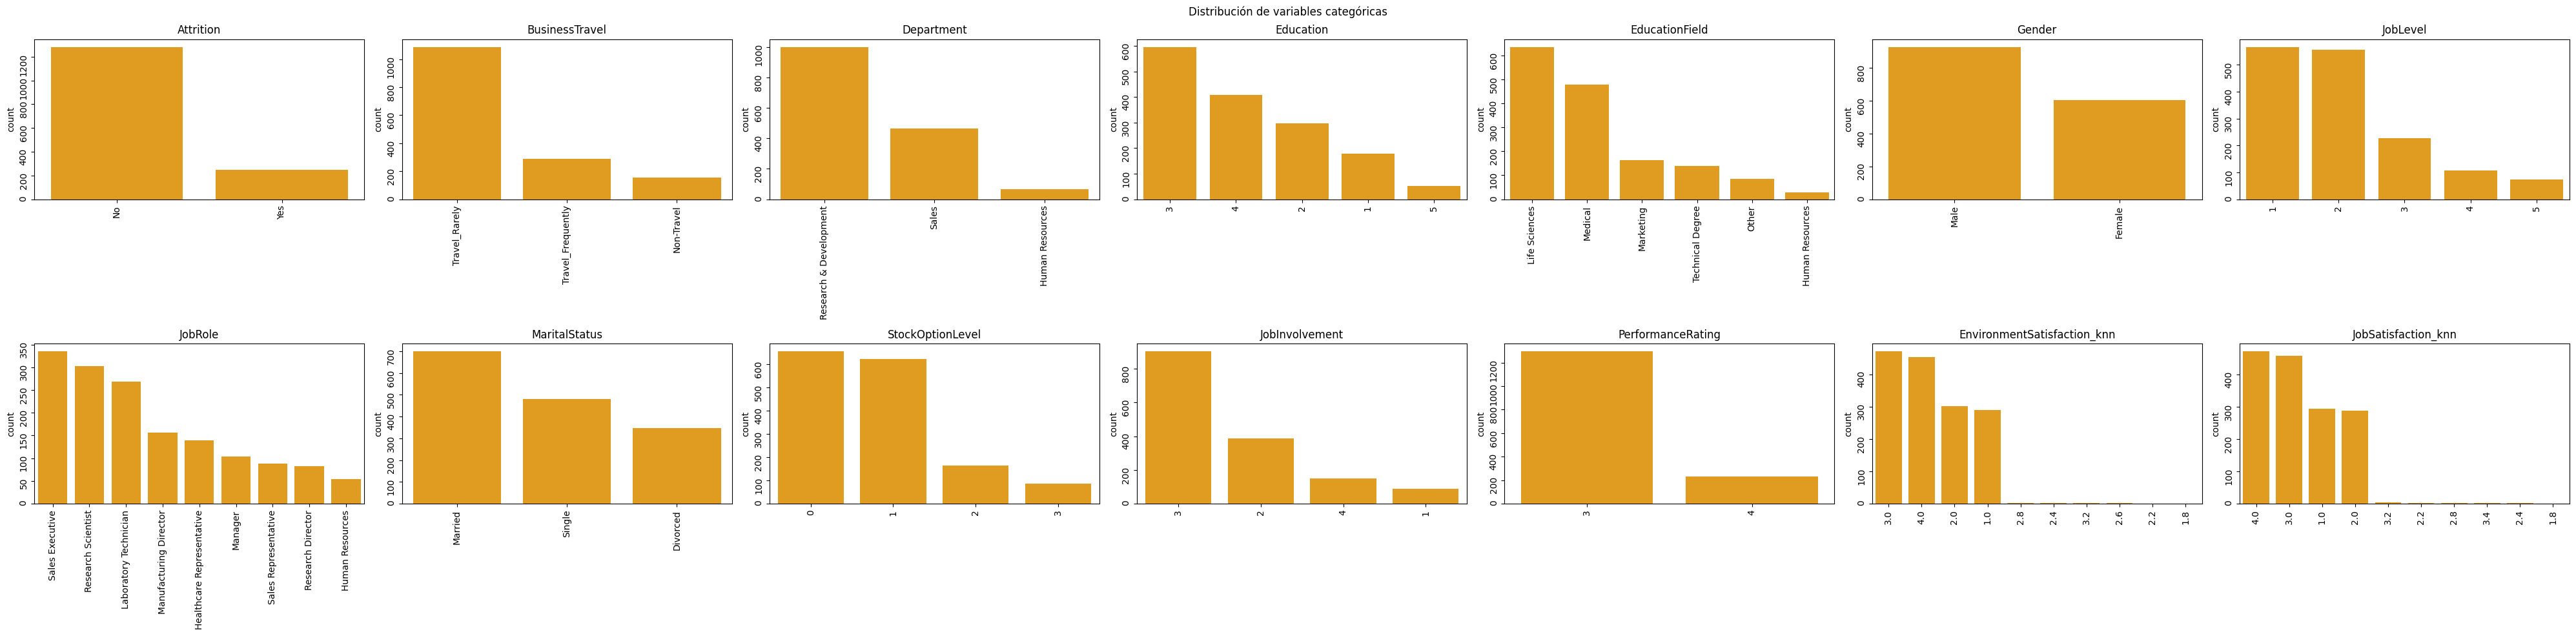

In [18]:
# evaluamos la distribución de las variables categóricas
visualizador.plot_categoricas(color = "orange")

In [19]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,3,3,3.0,4.0,1.0,1.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,2,4,3.0,2.0,0.0,6.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,2,5,0,3,3,3,2.0,2.0,1.0,5.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,8,7,5,2,3,4.0,4.0,3.0,13.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,6,0,4,3,3,4.0,1.0,4.0,9.0


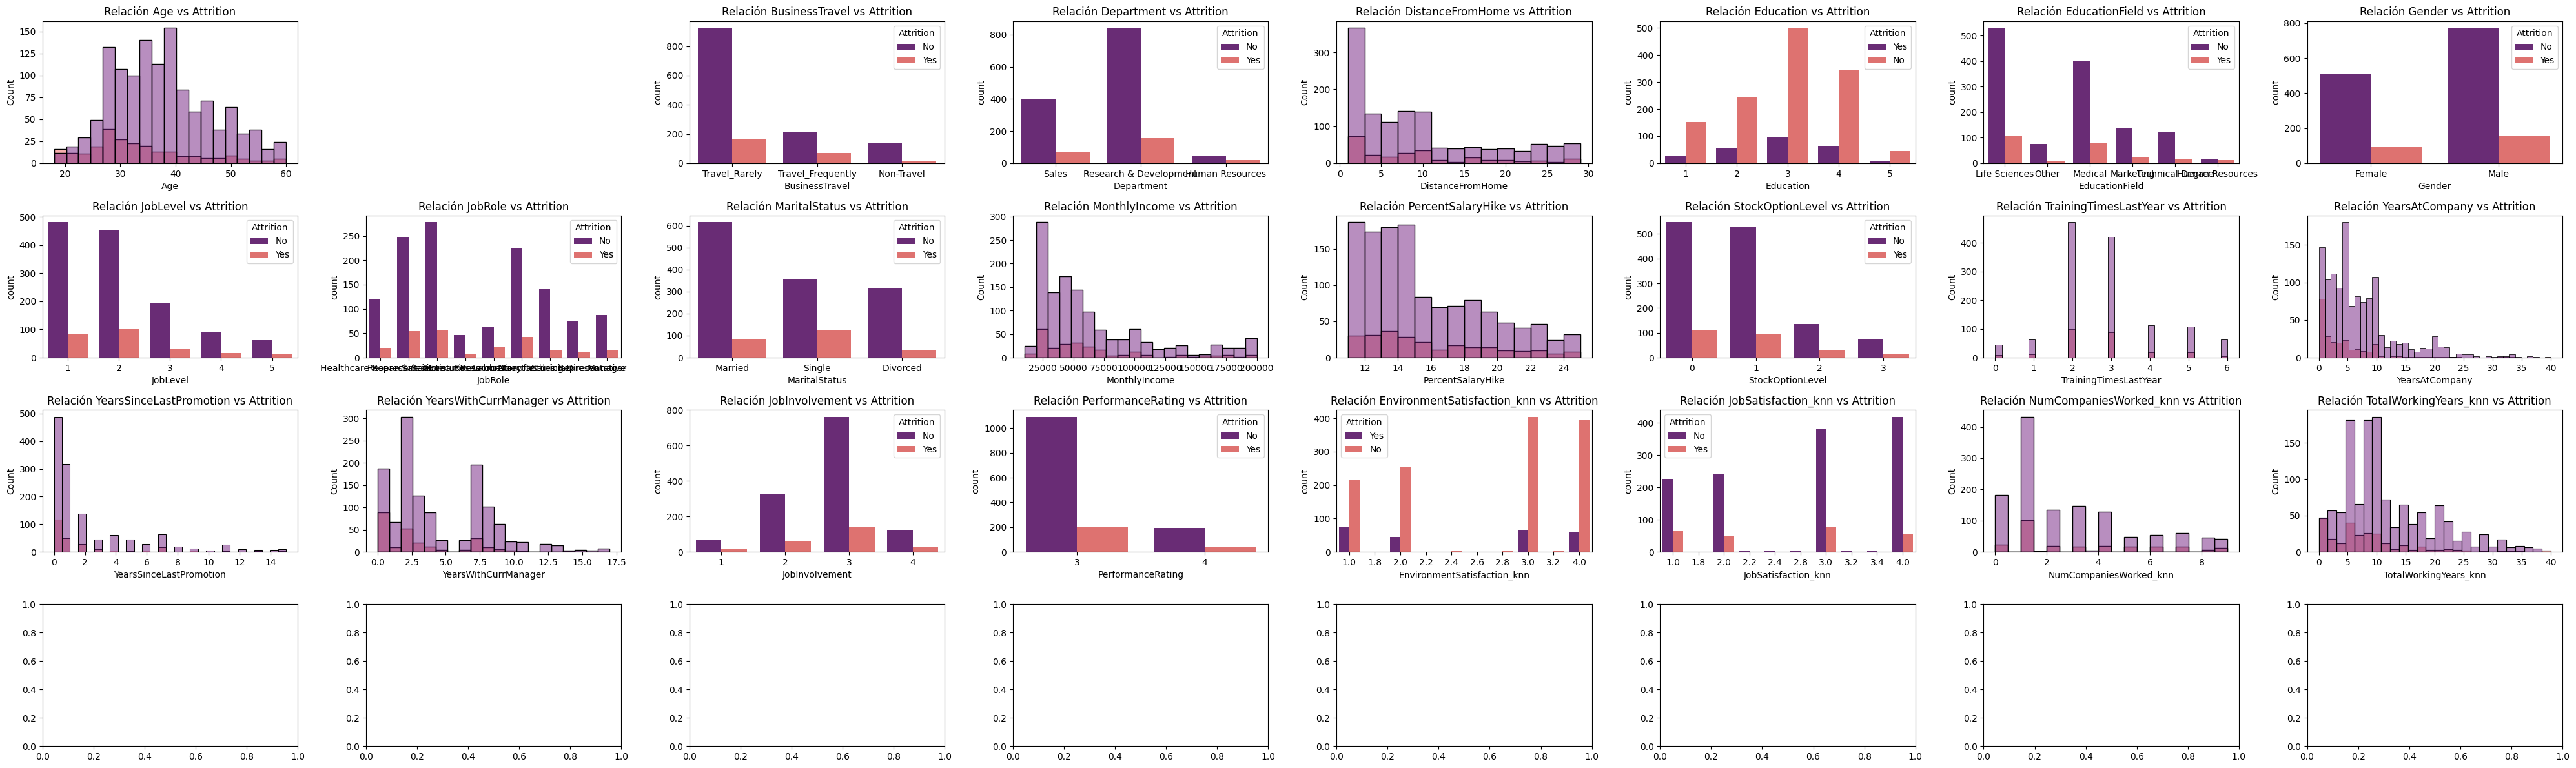

In [20]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

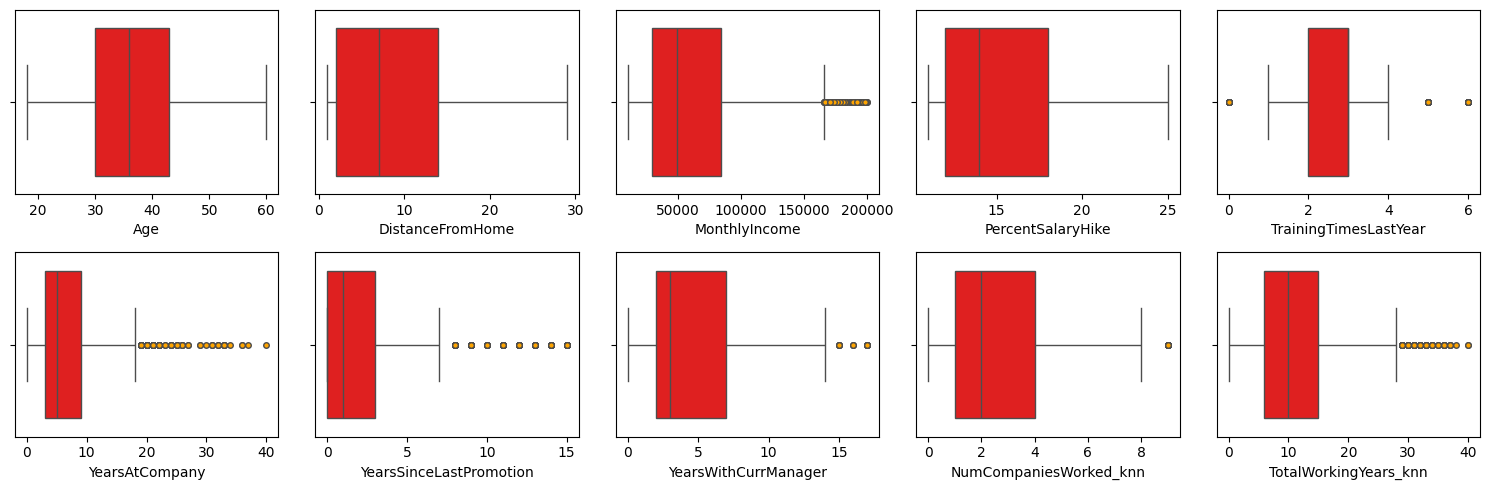

In [21]:
# detectamos los outliers
visualizador.deteccion_outliers(color = "red")

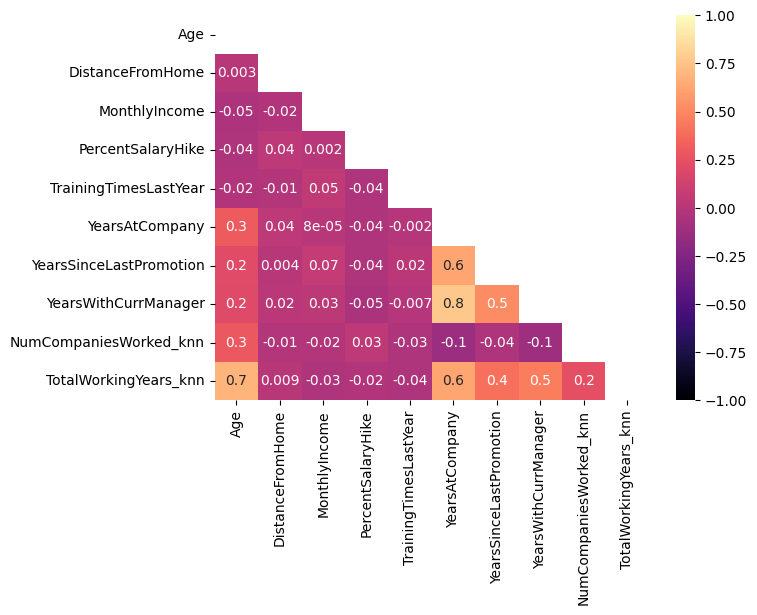

In [22]:
# evaluamos las correlaciones entre las variables numéricas
visualizador.correlacion()


In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction_knn',
       'JobSatisfaction_knn', 'NumCompaniesWorked_knn',
       'TotalWorkingYears_knn'],
      dtype='object')

In [24]:
#Volvemos a  a cambiar a float las columnas que que antes hemos metido como categorias para el procesamiento.
df['EnvironmentSatisfaction_knn'] = df['EnvironmentSatisfaction_knn'].astype('float')
df['JobSatisfaction_knn'] = df['JobSatisfaction_knn'].astype('float')
df['PerformanceRating'] = df['PerformanceRating'].astype('float')
df['JobLevel'] = df['JobLevel'].astype('float')
df['StockOptionLevel'] = df['StockOptionLevel'].astype('float')
df['JobInvolvement'] = df['JobInvolvement'].astype('float')
df['Education'] = df['Education'].astype('float')



In [25]:
# Instanciamos la clase de Escalado
escalar = sf.FeatureScaling(dataframe = df, lista_numericas = df.select_dtypes(include = np.number).columns)

# llamamos al método para estandarizar los datos
df_standard = escalar.standard_scaler()
df_standard.head()

# generamos un DataFrame final con en el que trabajaremos en siguientes lecciones 
df_esta = escalar.unir_datos_escalados(df_standard)
df_esta.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,1.552222,No,Travel_Rarely,Sales,-0.390933,-0.884892,Life Sciences,Female,-0.959114,Healthcare Representative,...,2.489867,-0.983278,-0.681413,-1.154807,0.381217,-0.424009,0.260386,1.155866,-0.681929,-1.326930
1,-0.651136,Yes,Travel_Frequently,Research & Development,0.101538,-1.860378,Life Sciences,Female,-0.959114,Research Scientist,...,0.152368,-0.329043,-0.370497,-0.034083,-1.019938,2.358438,0.260386,-0.670443,-1.082863,-0.681704
2,-0.540968,No,Travel_Frequently,Research & Development,0.963362,1.066081,Other,Male,1.749911,Sales Executive,...,-0.626798,-0.329043,-0.681413,-0.314264,0.381217,-0.424009,-0.662065,-0.670443,-0.681929,-0.810749
3,0.120039,No,Non-Travel,Research & Development,-0.883404,2.041567,Life Sciences,Male,0.846903,Human Resources,...,1.710701,0.161633,1.495002,0.246097,-1.019938,-0.424009,1.182836,1.155866,0.119939,0.221614
4,-0.540968,No,Travel_Rarely,Research & Development,0.101538,-1.860378,Medical,Male,-0.959114,Sales Executive,...,-0.626798,-0.165484,-0.681413,-0.034083,0.381217,-0.424009,1.182836,-1.583597,0.520874,-0.294568


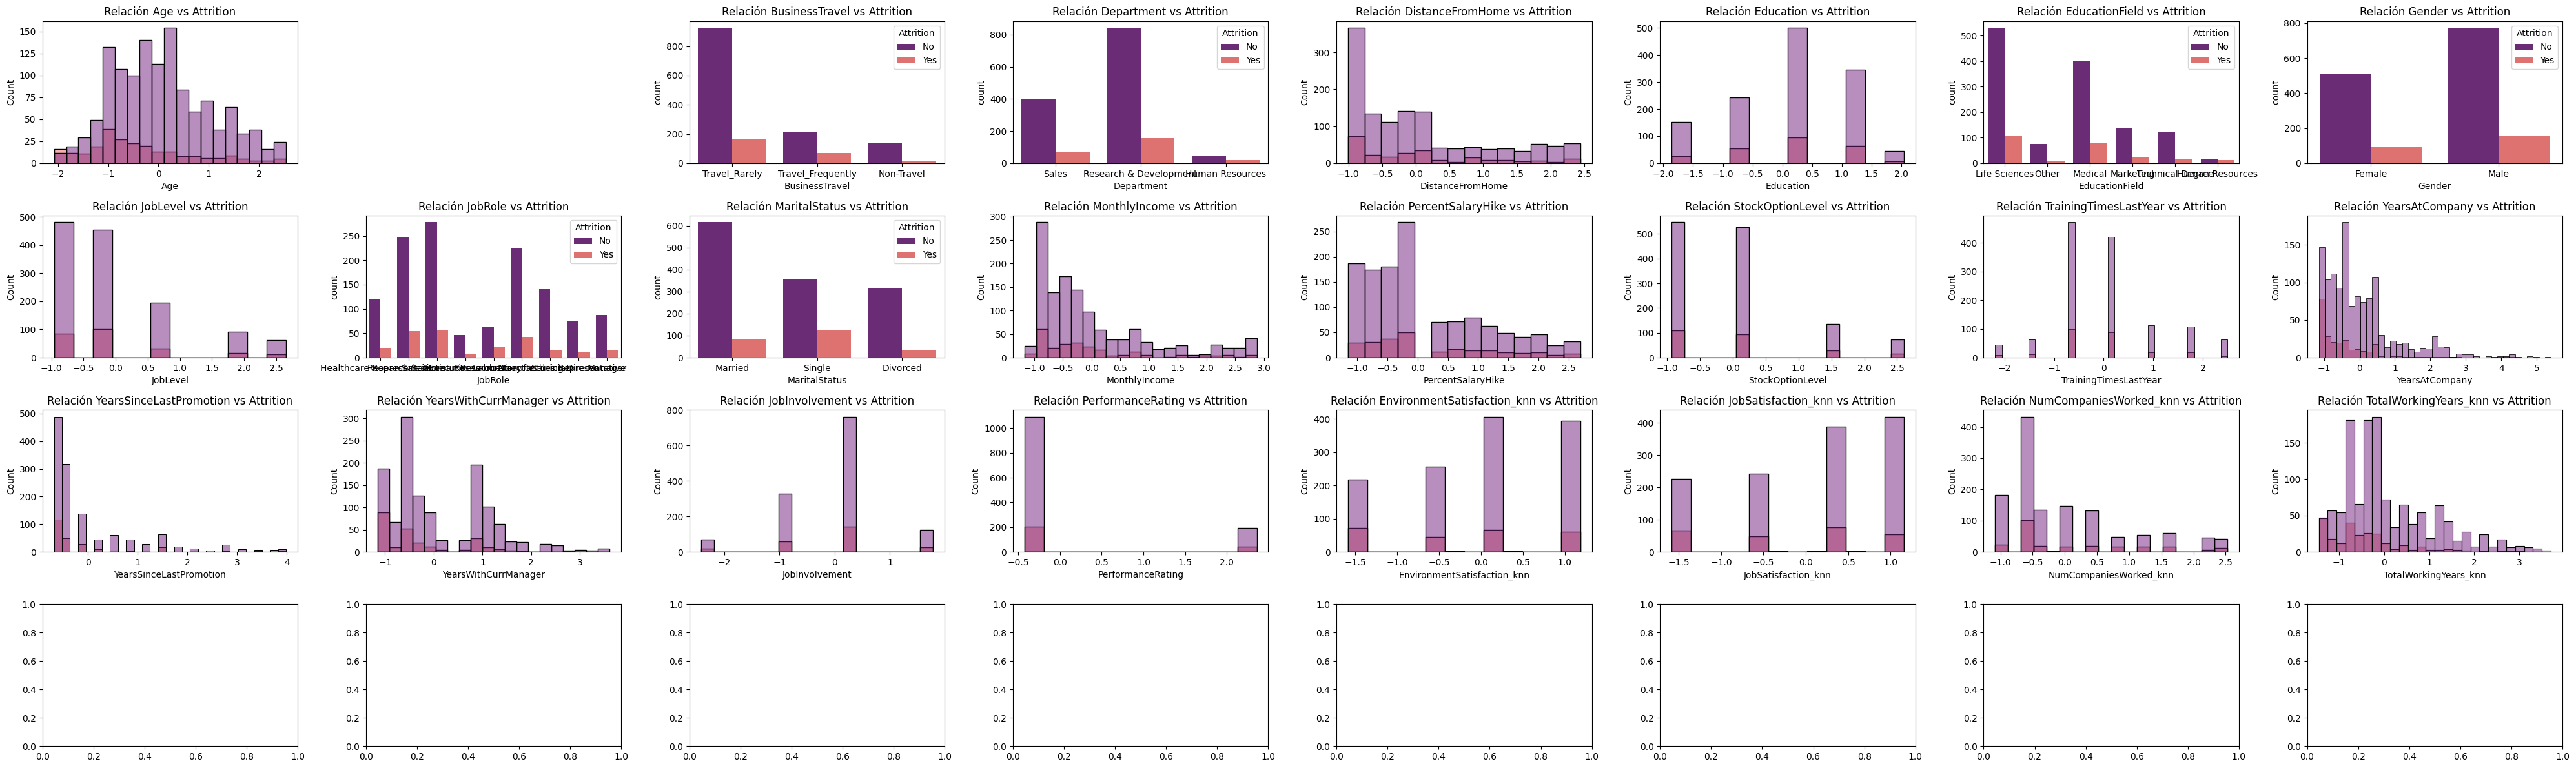

In [26]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

In [27]:
# antes de nada debemos convertir la variable respuesta en numérica, por lo que asignaremos Yes con 1, y No con 0
mapa_purchase = {"Yes": 1, "No": 0}
df["Attrition"] = df["Attrition"].map(mapa_purchase)

# sacamos la lista de columnas categóricas
lista_col_categ = df.select_dtypes(include = ["O", "category"])

for columna in lista_col_categ:

    print(f"Analizando la relación entre Attrition y {columna.upper()}")
    # Inicializar la clase
    analisis_chi2 = se.AnalisisChiCuadrado(df, variable_predictora = columna, variable_respuesta = 'Attrition')

    # Generar la tabla de contingencia
    tabla_contingencia = analisis_chi2.generar_tabla_contingencia()

    # Realizar la prueba de Chi-cuadrado
    resultado_chi2 = analisis_chi2.realizar_prueba_chi_cuadrado()

    print("\n ##################################### \n")

Analizando la relación entre Attrition y BUSINESSTRAVEL
Tabla de contingencia:


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,142,216,925
1,12,72,162



Resultado de la prueba de Chi-cuadrado:
Chi2: 25.92344119358323, p-valor: 2.3485308470167562e-06
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y DEPARTMENT
Tabla de contingencia:


Department,Human Resources,Research & Development,Sales
Attrition,,,
0,44,843,396
1,21,157,68



Resultado de la prueba de Chi-cuadrado:
Chi2: 13.483469312548914, p-valor: 0.0011805974485882959
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y EDUCATIONFIELD
Tabla de contingencia:


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
0,16,530,138,399,76,124
1,12,105,25,79,10,15



Resultado de la prueba de Chi-cuadrado:
Chi2: 19.24823093870649, p-valor: 0.001727841915903278
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y GENDER
Tabla de contingencia:


Gender,Female,Male
Attrition,,
0,510,773
1,92,154



Resultado de la prueba de Chi-cuadrado:
Chi2: 0.38499292010101804, p-valor: 0.5349431487647116
El p-valor >= 0.05, no hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y JOBROLE
Tabla de contingencia:


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
0,119,47,225,88,140,62,248,278,76
1,20,7,43,16,16,21,54,57,12



Resultado de la prueba de Chi-cuadrado:
Chi2: 11.198676404749444, p-valor: 0.19069404935529505
El p-valor >= 0.05, no hay diferencias entre los grupos.

 ##################################### 

Analizando la relación entre Attrition y MARITALSTATUS
Tabla de contingencia:


MaritalStatus,Divorced,Married,Single
Attrition,,,
0,313,615,355
1,35,85,126



Resultado de la prueba de Chi-cuadrado:
Chi2: 53.84261372644016, p-valor: 2.0334101341849137e-12
El p-valor < 0.05, parece que hay diferencias entre los grupos.

 ##################################### 



In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction_knn',
       'JobSatisfaction_knn', 'NumCompaniesWorked_knn',
       'TotalWorkingYears_knn'],
      dtype='object')

In [29]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction_knn,JobSatisfaction_knn,NumCompaniesWorked_knn,TotalWorkingYears_knn
0,1.552222,0,Travel_Rarely,Sales,-0.390933,-0.884892,Life Sciences,Female,-0.959114,Healthcare Representative,...,2.489867,-0.983278,-0.681413,-1.154807,0.381217,-0.424009,0.260386,1.155866,-0.681929,-1.326930
1,-0.651136,1,Travel_Frequently,Research & Development,0.101538,-1.860378,Life Sciences,Female,-0.959114,Research Scientist,...,0.152368,-0.329043,-0.370497,-0.034083,-1.019938,2.358438,0.260386,-0.670443,-1.082863,-0.681704
2,-0.540968,0,Travel_Frequently,Research & Development,0.963362,1.066081,Other,Male,1.749911,Sales Executive,...,-0.626798,-0.329043,-0.681413,-0.314264,0.381217,-0.424009,-0.662065,-0.670443,-0.681929,-0.810749
3,0.120039,0,Non-Travel,Research & Development,-0.883404,2.041567,Life Sciences,Male,0.846903,Human Resources,...,1.710701,0.161633,1.495002,0.246097,-1.019938,-0.424009,1.182836,1.155866,0.119939,0.221614
4,-0.540968,0,Travel_Rarely,Research & Development,0.101538,-1.860378,Medical,Male,-0.959114,Sales Executive,...,-0.626798,-0.165484,-0.681413,-0.034083,0.381217,-0.424009,1.182836,-1.583597,0.520874,-0.294568


In [30]:
diccionario_encoding = { "target": ['Gender', "JobLevel"] , 
                        "onehot": ['MaritalStatus','JobRole','BusinessTravel', 'Department','EducationField']} 
# En caso de que queramos aplicar el método solo a una columna
encoding = se.Encoding(df, variable_respuesta="Attrition", diccionario_encoding=diccionario_encoding)
df = encoding.one_hot_encoding()
df = encoding.target_encoding()
df.head()

['Gender', 'JobLevel']


Gender
Male      927
Female    602
Name: count, dtype: int64

JobLevel
-0.959114    566
-0.056106    556
 0.846903    226
 1.749911    108
 2.652920     73
Name: count, dtype: int64

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1.552222,0,-0.390933,-0.884892,0.152824,0.150177,1.407855,-1.153537,-0.932989,2.489867,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.651136,1,0.101538,-1.860378,0.152824,0.150177,-0.491295,2.142180,0.244996,0.152368,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.540968,0,0.963362,1.066081,0.166127,0.157408,2.729411,-0.054965,2.600968,-0.626798,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.120039,0,-0.883404,2.041567,0.166127,0.141593,0.387756,-1.153537,2.600968,1.710701,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.540968,0,0.101538,-1.860378,0.166127,0.150177,-0.884231,-0.878894,1.422982,-0.626798,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


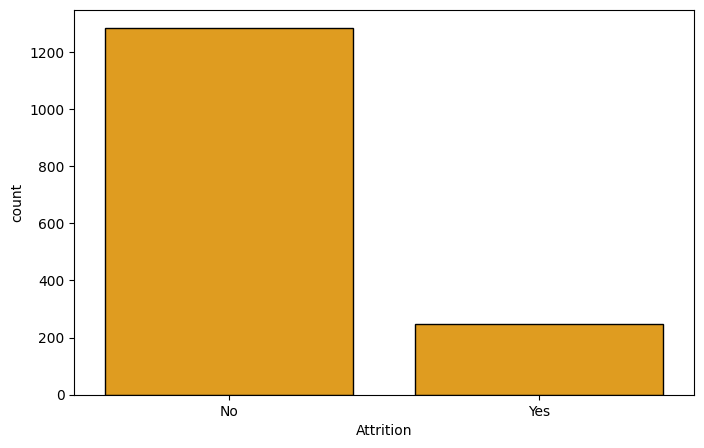

In [31]:
desbalanceo = sl.Desbalanceo(dataframe = df, variable_dependiente = "Attrition")
desbalanceo.visualizar_clase()

##  Vemos un gran Desbalanceo por lo que vamos a Balancear mediante el Smotenc

In [32]:
# lo siguiente que tenemos que hacer es dividir los datos en X e Y 
X = df.drop(columns = "Attrition")
y = df["Attrition"]

In [33]:
# dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'Gender',
       'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction_knn', 'JobSatisfaction_knn',
       'NumCompaniesWorked_knn', 'TotalWorkingYears_knn',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales

In [35]:
columnas_smot = ['Gender', 'JobLevel',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree']

In [36]:
# aplicamos el smotenc
smotenc = SMOTENC(categorical_features=columnas_smot, random_state=42, k_neighbors=5) 
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# Mostrar el dataset balanceado
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Attrition'] = y_resampled


In [37]:
resampled_data

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,...,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition
0,1.552222,-0.390933,-0.884892,0.152824,0.150177,1.407855,-1.153537,-0.932989,2.489867,-0.983278,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.651136,0.101538,-1.860378,0.152824,0.150177,-0.491295,2.142180,0.244996,0.152368,-0.329043,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.540968,0.963362,1.066081,0.166127,0.157408,2.729411,-0.054965,2.600968,-0.626798,-0.329043,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.120039,-0.883404,2.041567,0.166127,0.141593,0.387756,-1.153537,2.600968,1.710701,0.161633,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.540968,0.101538,-1.860378,0.166127,0.150177,-0.884231,-0.878894,1.422982,-0.626798,-0.165484,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,-0.947386,-0.013305,-1.860378,0.166127,0.181655,-0.862842,1.782143,-0.121273,-0.089897,-0.718009,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2562,0.045000,-1.006521,-0.884892,0.166127,0.150177,0.257199,-0.533488,-0.629479,-0.626798,-0.619025,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2563,-0.569664,0.762651,-0.524193,0.166127,0.181655,-0.307133,-0.258070,-0.715201,0.152368,0.518990,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2564,1.323636,-0.684571,-0.284989,0.152824,0.150177,-0.808298,0.030211,0.244996,-0.926794,-0.140122,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


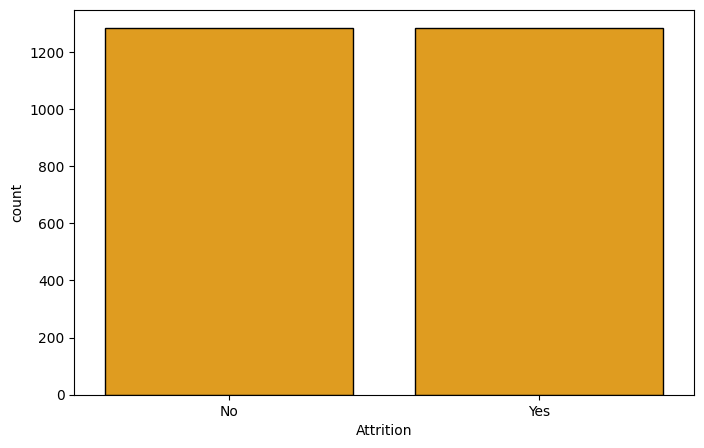

In [38]:
desbalanceo = sl.Desbalanceo(dataframe = resampled_data, variable_dependiente = "Attrition")
desbalanceo.visualizar_clase()

In [39]:
resampled_data.to_pickle('../datos_pkl/datos_preprocesados.pkl')